# Banking Project -  Term Deposit Marketing Prediction 
### Careerera - Banking Capstone Project ,  Submission by:  Naveen Nainegali

### Import Required Libraries

In [397]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import statistics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


### Variable Declarations 

In [355]:
display = (11.7, 8.27) #for diplaying figure

### Functions

In [356]:
def quick_plot(df, var1, var2, title):
    """
    this function plots crosstab bar plot between 2 categorical variables
    """
    ylabel = "ratio"
    cross_tab = pd.crosstab(df[var1], df[var2])
    cross_tab["total"] = cross_tab.iloc[:, 0] + cross_tab.iloc[:, 1]
    cross_tab["no_ratio"] = cross_tab.iloc[:, 0] / cross_tab.iloc[:, 2]
    cross_tab["yes_ratio"] = cross_tab.iloc[:, 1] / cross_tab.iloc[:, 2]
    print(cross_tab)
    cross_tab.iloc[:, 3:].plot(kind = "bar", title = title, figsize = (18, 9))
    plt.ylabel(ylabel)
    plt.show()

### Reading Dataset 

In [357]:
df = pd.read_csv('Data/bank-full.csv', header=0 ,sep= ";") 
df_test = pd.read_csv('Data/bank.csv', header=0 ,sep= ";") 

#Dataset Available in my github repo as well 
##https://github.com/ainaveen/careerera-capstone/blob/7aa40fc6f0d52346e33c05b3492e36820eeebf8c/Data/bank-full.csv
##https://github.com/ainaveen/careerera-capstone/blob/7aa40fc6f0d52346e33c05b3492e36820eeebf8c/Data/bank.csv

In [358]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [359]:
print('\n Checking for NULLs in Bank Dataset')
print('\n')
print(df.info())
df[df["duration"]<10].y.value_counts()


 Checking for NULLs in Bank Dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


no     341
yes      1
Name: y, dtype: int64

In [360]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Visualization ### 

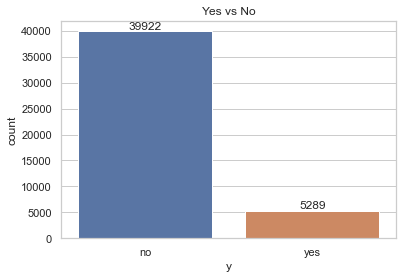

In [361]:
sns.set_theme(style="whitegrid")
plt.title("Yes vs No")
ax = sns.countplot(x="y", data=df)
ax.bar_label(ax.containers[0])

# fig, ax = plt.subplots(figsize=display)
# sns.histplot(data=df, x="duration",bins=2 )
plt.show()

In [362]:
print('\n Checking for NULLs in Test Dataset')
print('\n')
print(df_test.info())


 Checking for NULLs in Test Dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


***Observation : No Null values found in Bank full data or even in the Test Sample data***

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='age', ylabel='Count'>

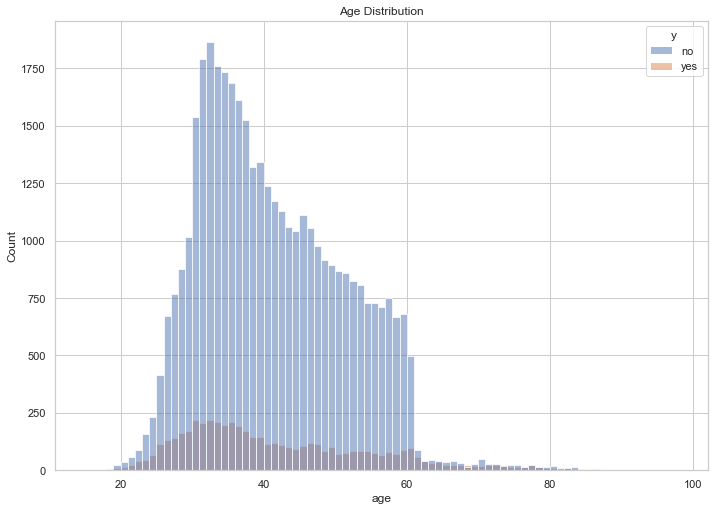

In [363]:
fg, ax = plt.subplots(figsize=display)
plt.title("Age Distribution")
sns.histplot(data=df, x="age",bins=1 , binwidth=1,binrange=(15,98) ,hue='y')

***Observations : From Age Distribution***
- Campaign covered wide age groups, from 18 years to 95.
- More frequent age groups were 21 years to 61 years
- Success ratio is more upto 25 years and after 60 years i.e. < 25years and > 60years

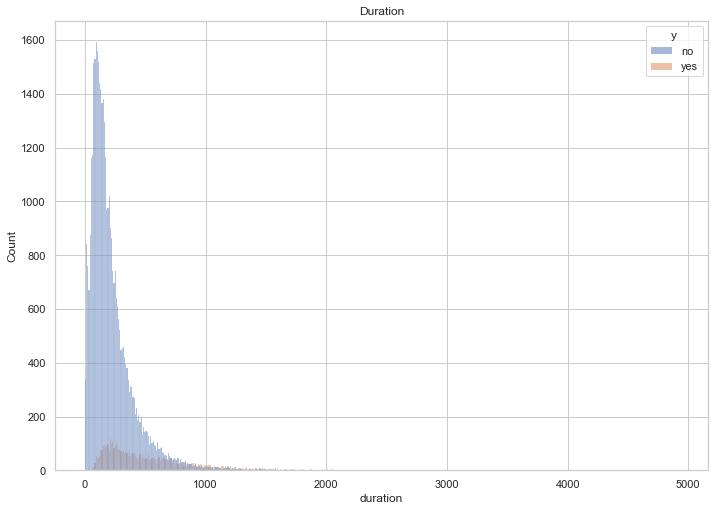

In [364]:
fig, ax = plt.subplots(figsize=display)
plt.title("Duration")
sns.histplot(data=df, x="duration",bins=500 ,hue='y')
plt.show()

### Observations : From Duration
- Right Skewed data
- Less than 10 seconds call has generally not resulted in any success
- Long duration call has also not resulted in any success

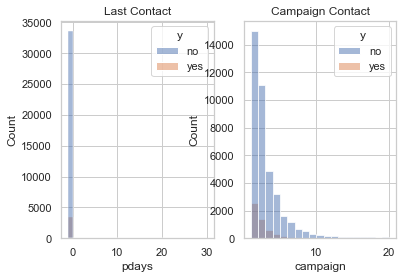

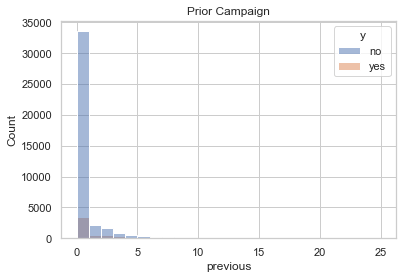

In [365]:
# fig, ax = plt.subplots(figsize=display)
plt.subplot(1, 2, 1)
plt.title("Last Contact")
# plt.xlabel("Days Ssince Last Contact")
# print(df['pdays'].value_counts())
sns.histplot(data=df, x="pdays",bins=1, binwidth=1,binrange=(-1,30),hue='y')

# print(df['campaign'].value_counts())
plt.subplot(1, 2, 2)
plt.title("Campaign Contact")
# plt.xlabel("Number of Contacts")
plt.ylabel("Count")
sns.histplot(data=df, x='campaign',bins=1, binwidth=1,binrange=(1,20),hue='y')
plt.show()
plt.subplot(1, 1, 1)
plt.title("Prior Campaign")
# plt.xlabel("Contacts")
# print(df['pdays'].value_counts())
sns.histplot(data=df, x="previous",bins=1, binwidth=1,binrange=(0,25),hue='y')
plt.show()



### Observation : Mostly new customers were targeted, who were not been contacted before. 
- pdays : -1 have maximium values i.e. new customer
- previous : maximum number of entries is 0 i.e. new customer

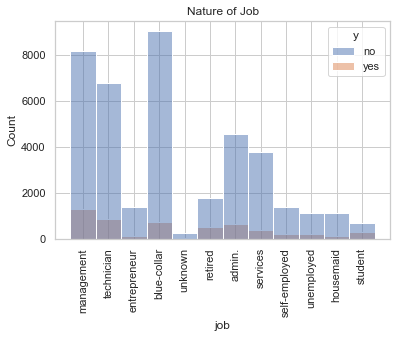

In [366]:
plt.title("Nature of Job")
# df['job'] = pd.Categorical(df['job'], ['management', 'technician', 'entrepreneur', 'blue-collar','unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']) #To give order to the graph
plt.xticks(rotation=90)
sns.histplot(data=df, x="job",bins=1, binwidth=10 ,hue='y')
plt.show()

### Observation : Among the job distribution Top 3  maximum success rate:
- Students - 40%
- Retired - 30%
- Unemployed - 18%

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


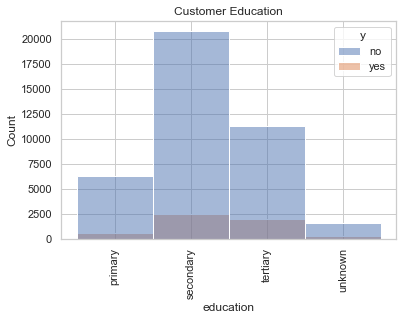

In [368]:
print(df['education'].value_counts())
plt.title("Customer Education")
df['education'] = pd.Categorical(df['education'], ['primary','secondary','tertiary','unknown']) #To give order to the graph
plt.xticks(rotation=90)
sns.histplot(data=df, x="education",bins=1,hue='y')
plt.show()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


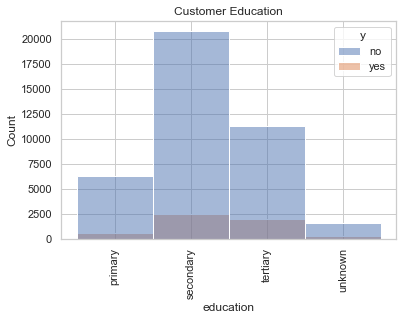

In [369]:
print(df['education'].value_counts())
plt.title("Customer Education")
plt.xticks(rotation=90)
sns.histplot(data=df, x="education",bins=1,hue='y')
plt.show()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


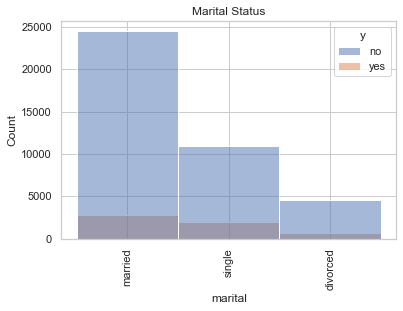

In [370]:
print(df['marital'].value_counts())
plt.title("Marital Status")
plt.xticks(rotation=90)
sns.histplot(data=df, x="marital",bins=1,hue='y')
plt.show()

no     44396
yes      815
Name: default, dtype: int64


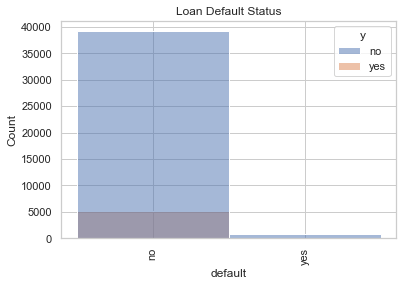

In [371]:
print(df['default'].value_counts())
plt.title("Loan Default Status")
plt.xticks(rotation=90)
sns.histplot(data=df, x="default",bins=1,hue='y')
plt.show()

yes    25130
no     20081
Name: housing, dtype: int64


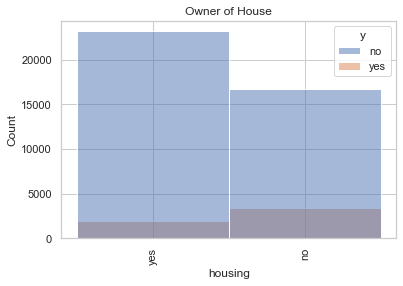

In [372]:
print(df['housing'].value_counts())
plt.title("Owner of House")
plt.xticks(rotation=90)
sns.histplot(data=df, x="housing",bins=1,hue='y')
plt.show()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


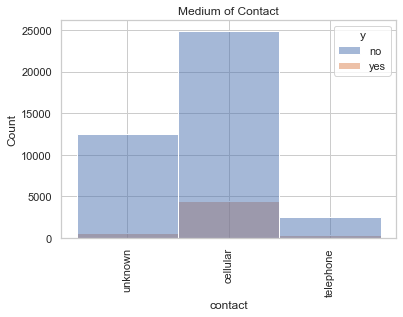

In [373]:
print(df['contact'].value_counts())
plt.title("Medium of Contact")
plt.xticks(rotation=90)
sns.histplot(data=df, x="contact",bins=1,hue='y')
plt.show()

no     37967
yes     7244
Name: loan, dtype: int64


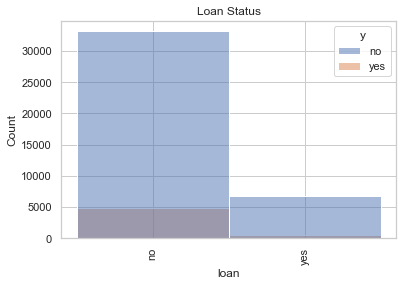

In [374]:
print(df['loan'].value_counts())
plt.title("Loan Status")
plt.xticks(rotation=90)
sns.histplot(data=df, x="loan",bins=1,hue='y')
plt.show()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


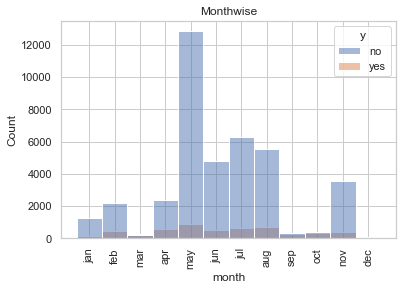

In [375]:
print(df['month'].value_counts())
df['month'] = pd.Categorical(df['month'], ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title("Monthwise")
plt.xticks(rotation=90)
sns.histplot(data=df, x="month",bins=1,hue='y')
plt.show()

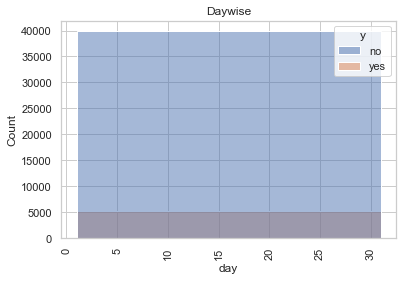

In [376]:
# print(df['day'].value_counts())
plt.title("Daywise")
plt.xticks(rotation=90)
sns.histplot(data=df, x="day",bins=1,hue='y')
plt.show()

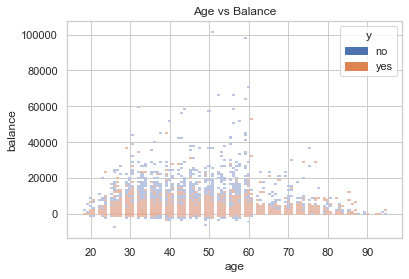

In [377]:
plt.title("Age vs Balance")
# plt.xticks(rotation=90)
sns.histplot(data=df, x="age",y="balance", bins=100,hue='y')
plt.show()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


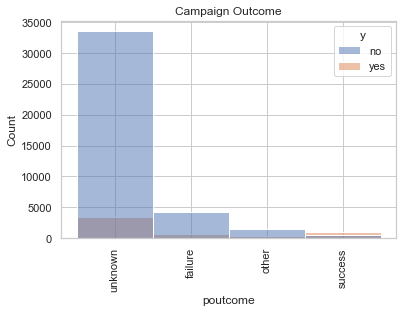

In [378]:
print(df['poutcome'].value_counts())
plt.title("Campaign Outcome")
plt.xticks(rotation=90)
sns.histplot(data=df, x="poutcome",bins=1,hue='y')
plt.show()

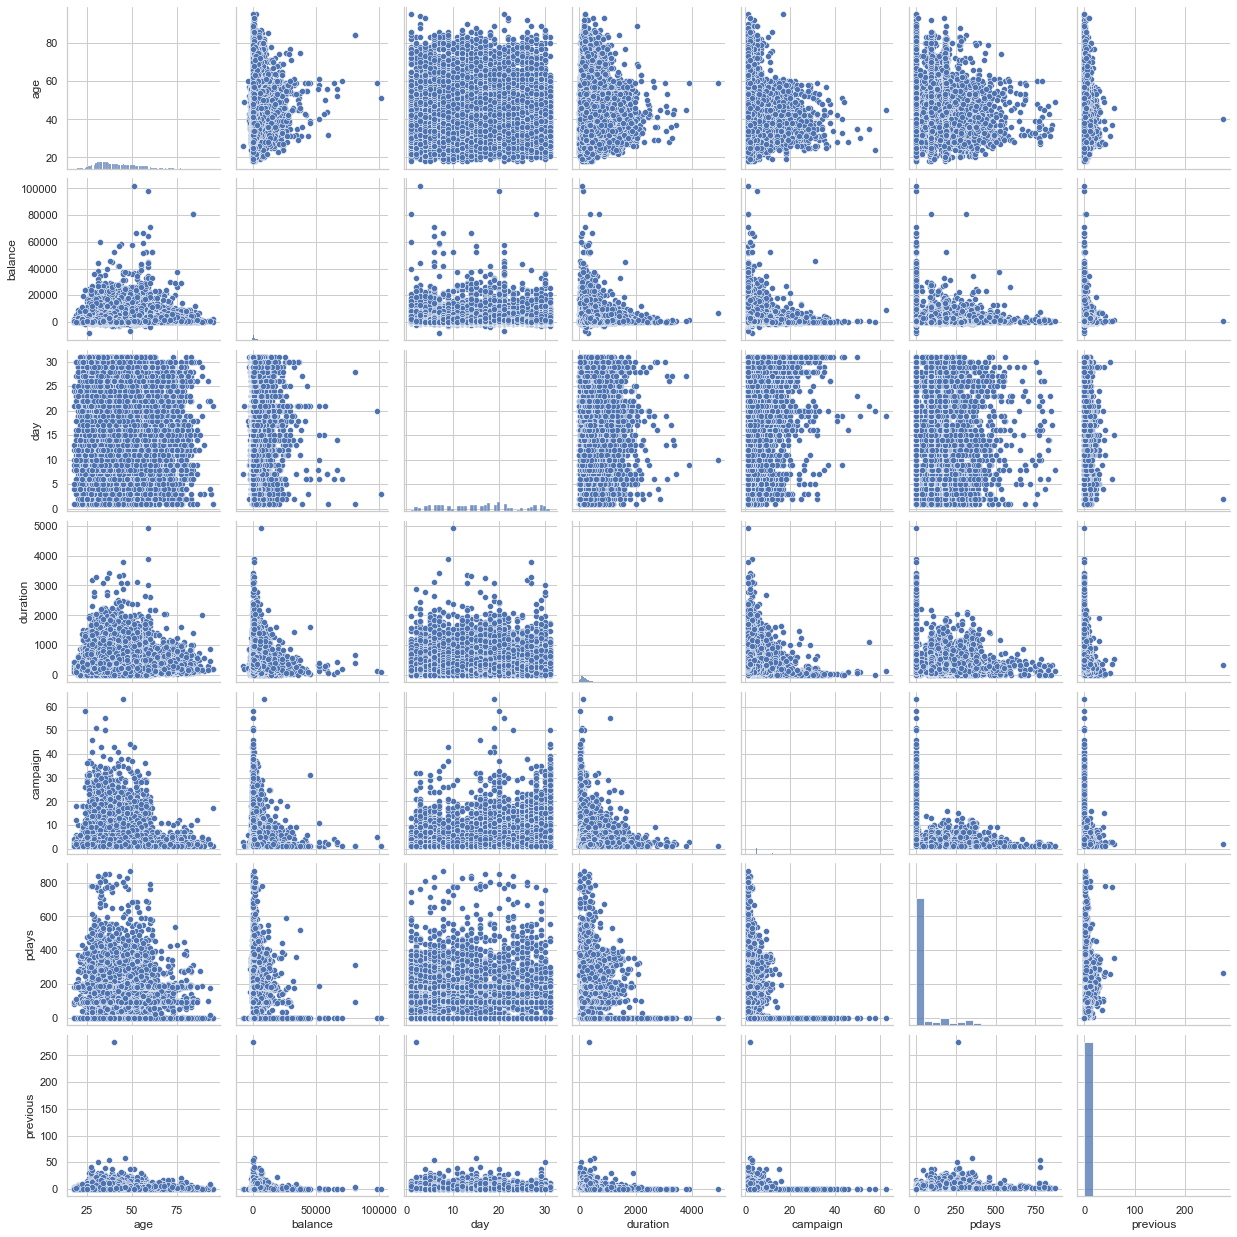

In [379]:
sns.pairplot(data=df);

y                no   yes  total  no_ratio  yes_ratio
job                                                  
admin.         4540   631   5171  0.877973   0.122027
blue-collar    9024   708   9732  0.927250   0.072750
entrepreneur   1364   123   1487  0.917283   0.082717
housemaid      1131   109   1240  0.912097   0.087903
management     8157  1301   9458  0.862444   0.137556
retired        1748   516   2264  0.772085   0.227915
self-employed  1392   187   1579  0.881571   0.118429
services       3785   369   4154  0.911170   0.088830
student         669   269    938  0.713220   0.286780
technician     6757   840   7597  0.889430   0.110570
unemployed     1101   202   1303  0.844973   0.155027
unknown         254    34    288  0.881944   0.118056


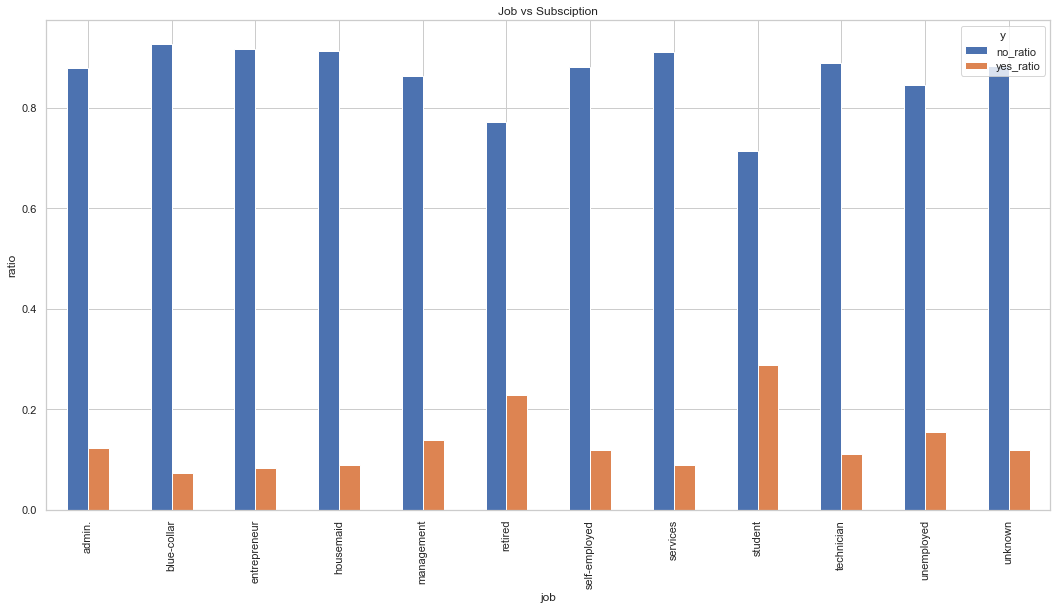

In [380]:
quick_plot(df,'job','y',"Job vs Subsciption")


y    no  yes  total  no_ratio  yes_ratio
age                                     
18    5    7     12  0.416667   0.583333
19   24   11     35  0.685714   0.314286
20   35   15     50  0.700000   0.300000
21   57   22     79  0.721519   0.278481
22   89   40    129  0.689922   0.310078
..   ..  ...    ...       ...        ...
90    0    2      2  0.000000   1.000000
92    0    2      2  0.000000   1.000000
93    0    2      2  0.000000   1.000000
94    1    0      1  1.000000   0.000000
95    1    1      2  0.500000   0.500000

[77 rows x 5 columns]


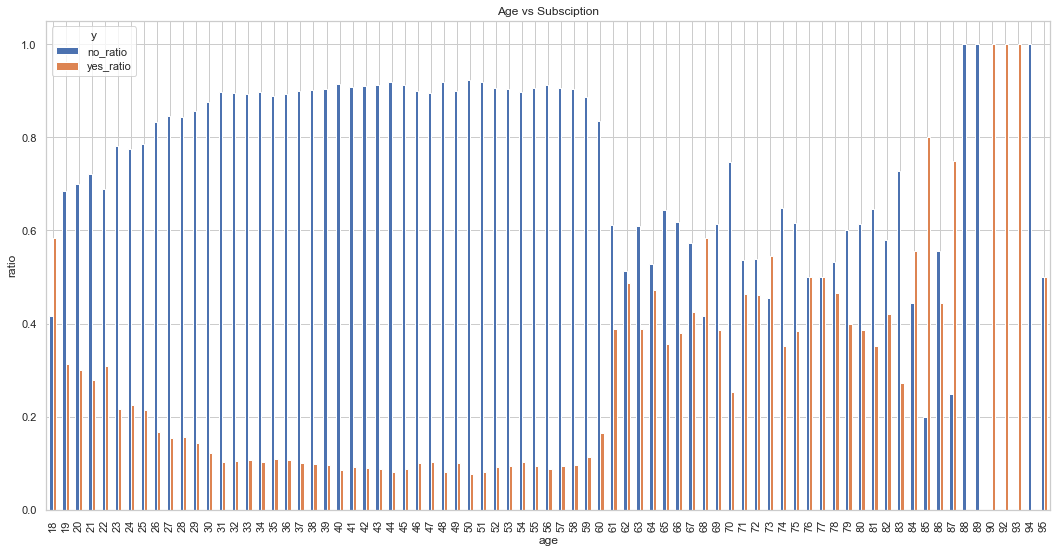

In [381]:
quick_plot(df,'age','y',"Age vs Subsciption")

y            no   yes  total  no_ratio  yes_ratio
marital                                          
divorced   4585   622   5207  0.880545   0.119455
married   24459  2755  27214  0.898765   0.101235
single    10878  1912  12790  0.850508   0.149492


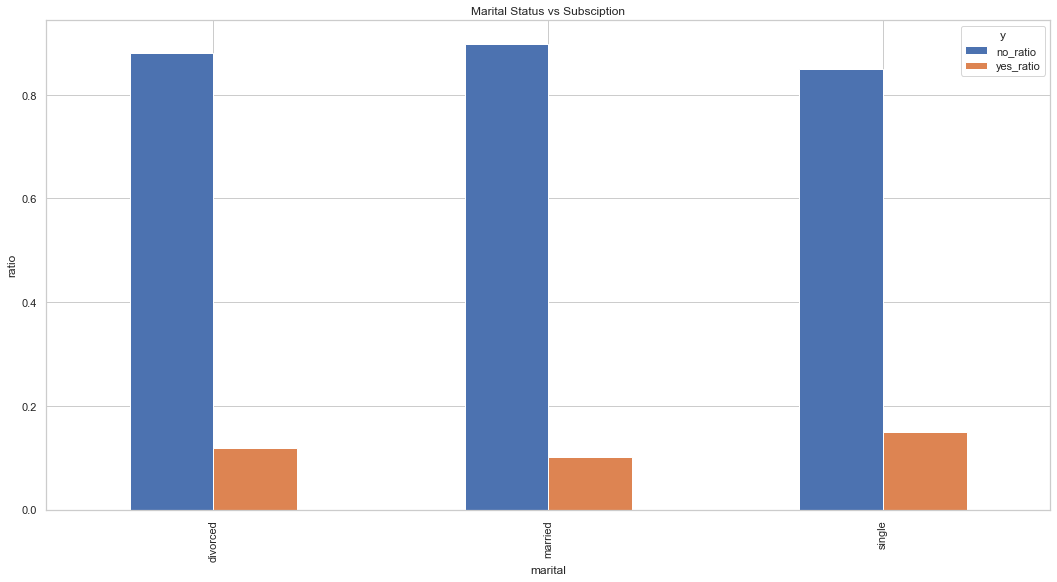

In [382]:
quick_plot(df,'marital','y',"Marital Status vs Subsciption")

y             no   yes  total  no_ratio  yes_ratio
education                                         
primary     6260   591   6851  0.913735   0.086265
secondary  20752  2450  23202  0.894406   0.105594
tertiary   11305  1996  13301  0.849936   0.150064
unknown     1605   252   1857  0.864297   0.135703


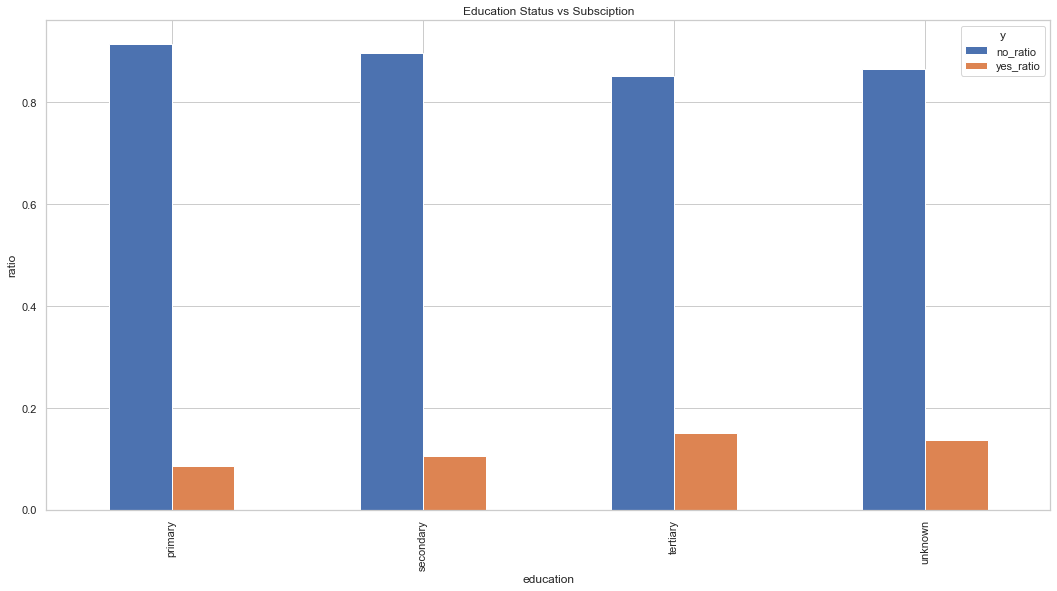

In [383]:
quick_plot(df,'education','y',"Education Status vs Subsciption")

### Feature Engineering

In [384]:
#lable encoding categorical features
categorical_cols = ['month', 'education', 'marital', 'job', 'default', 'loan','contact','poutcome','y','housing'] 
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

### Spliting, Train and Test  Dataset 

In [385]:
df_y= df['y']
col_list =df.columns.to_list()
col_list.remove('y')
df_x = df.filter(items=col_list)

In [386]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

# Classification alogorithm considered:

- Logistic Regression

- K-Nearest Neighbour

- Decision Tree

- Naive Bayes Gaussian

- Support Vector Classifier

- Random forest classifier

- Pipeline - Standard Scaler + SVC

We are gonna use fscore as metric with $\beta$ = 0.

### Model Selection 

LR: 0.891649 (0.002395)


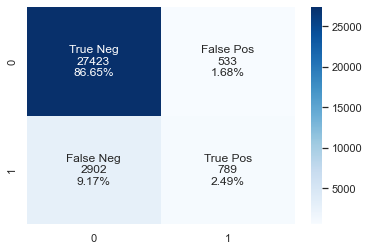

KNN: 0.881821 (0.003104)


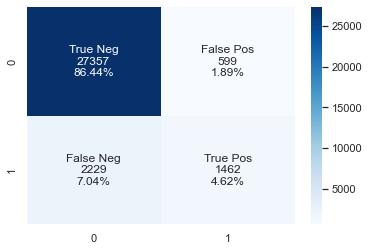

TREE: 0.872753 (0.006763)


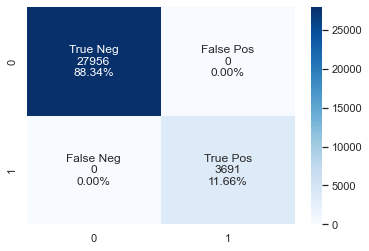

NB: 0.840680 (0.006008)


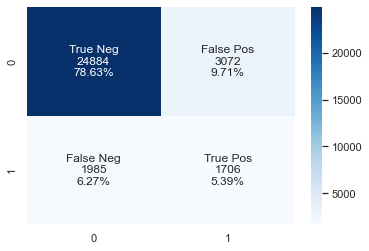

RFC: 0.905994 (0.005290)


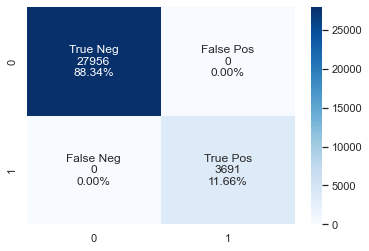

In [405]:
# Check Multiple Models

results = []
models = []

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
# models.append(('SVM', SVC(gamma='auto')))
# models.append(('PStdSVM', make_pipeline(StandardScaler(),SVC())))

names = []
group_names = ['True Neg','False Pos','False Neg','True Pos']

for name, model in models:
    model.fit(X_train, y_train)
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    y_pred = model.predict(X_train)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #Get the confusion matrix
    cf_matrix = confusion_matrix(y_train, y_pred)
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')    
    plt.show()


In [406]:
d = {'Model':names,'Accuracy':results}
df_new = pd.DataFrame(d, columns=['Model','Accuracy'])
df_n1 = pd.DataFrame(df_new["Accuracy"].to_list(), columns=["1", "2","3","4","5","6","7","8","9","10"])
df_n2 = pd.concat([df_new, df_n1], axis=1)
df_n2['Mean'] = df_n2.mean(axis=1)
# print(df_n2.info())
cols=["Accuracy","1", "2","3","4","5","6","7","8","9","10"]
df_n2.drop(labels=cols, axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     5 non-null      object 
 1   Accuracy  5 non-null      object 
 2   1         5 non-null      float64
 3   2         5 non-null      float64
 4   3         5 non-null      float64
 5   4         5 non-null      float64
 6   5         5 non-null      float64
 7   6         5 non-null      float64
 8   7         5 non-null      float64
 9   8         5 non-null      float64
 10  9         5 non-null      float64
 11  10        5 non-null      float64
 12  Mean      5 non-null      float64
dtypes: float64(11), object(2)
memory usage: 648.0+ bytes
None


In [407]:
df_n2

,Model,Mean
0,LR,0.891649
1,KNN,0.881821
2,TREE,0.872753
3,NB,0.840680
4,RFC,0.905994


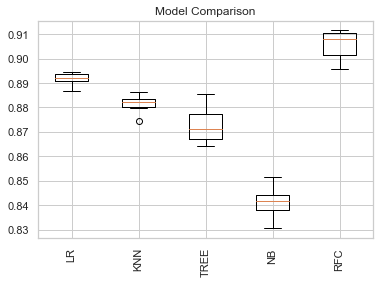

In [408]:
# Compare Algorithms
plt.boxplot(results, labels=names,autorange=True,zorder =True)
plt.xticks(rotation=90)
plt.title('Model Comparison')
plt.show()

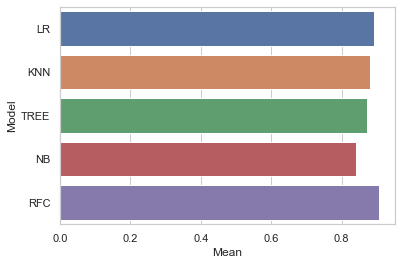

In [409]:
sns.barplot("Mean","Model",data=df_n2)
plt.show()

### Hyperparameter  :
#### GridsearchCV

In [436]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * (np.mean(errors) / np.mean(test_labels))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [437]:
clf_rfc = RandomForestClassifier(n_estimators = 10, random_state = 10)
clf_rfc.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
y_pred=clf_rfc.predict(X_test)
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),6)*100,'%')

Model Performance
Average Error: 0.1016 degrees.
Accuracy = 13.77%.
Accuracy: 89.8408 %


[0.1075827  0.04834762 0.02078292 0.02557247 0.00242158 0.10868369
 0.02852088 0.01070287 0.01944762 0.08792749 0.08600525 0.28903793
 0.03966369 0.04949068 0.01448084 0.06133177]


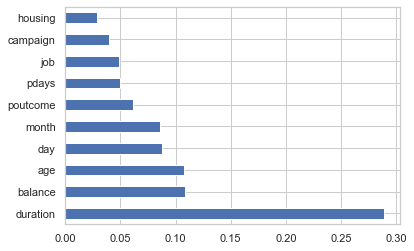

In [416]:
print(clf_rfc.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf_rfc.feature_importances_, index=X_test.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [417]:
# gsv = GridSearchCV(rfc, parameters,scoring='accuracy',cv=5)
# gsv.fit(X_train, y_train,)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [459]:
gird_dicn = grid_search.best_params_

In [438]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print(base_accuracy)
print(grid_accuracy)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0975 degrees.
Accuracy = 17.21%.
13.767209011264086
17.209011264080104
Improvement of 25.00%.


### Hyperparameter  :
#### RandomizedSearchCV

In [418]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [462]:
rnd_dicn = rf_random.best_params_
# dict_keys(['n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'bootstrap'])
rnd_dicn['n_estimators']

1400

In [443]:
random_accuracy = evaluate(rf_random, X_test, y_test)
print(random_accuracy)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0966 degrees.
Accuracy = 18.02%.
18.022528160200253
Improvement of 30.91%.


### Model Tuning 

In [460]:
##Using GridSearchCV
# clf=RandomForestClassifier(n_estimators=1000,min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 10, bootstrap =True,random_state=1)
clf=RandomForestClassifier(n_estimators=grid_dicn['n_estimators'],min_samples_split= grid_dicn['min_samples_split'], max_features = grid_dicn['max_features'] ,max_depth= grid_dicn['max_depth'] , bootstrap = grid_dicn['bootstrap'], random_state= 1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),6)*100,'%')

Accuracy: 90.4158 %


In [463]:
##Using ReandomSearchCV
clf_rnd=RandomForestClassifier(bootstrap=rnd_dicn['bootstrap'],max_depth=rnd_dicn['max_depth'],max_features=rnd_dicn['max_features'],min_samples_leaf=rnd_dicn['min_samples_leaf'],min_samples_split=rnd_dicn['min_samples_split'], n_estimators=rnd_dicn['n_estimators'],random_state=1)
clf_rnd.fit(X_train,y_train)
y_pred=clf_rnd.predict(X_test)
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),6)*100,'%')

Accuracy: 90.4158 %


## RandomForrestClassifier is estimated to be the Best Model that can be applied on the Bank Customer data, to predict marketing decision

## Testing the accuracy on the sample bank dataset to validate the Model 

In [469]:
df = pd.read_csv('Data/bank.csv', header=0 ,sep= ";") 
#lable encoding categorical features
categorical_cols = ['month', 'education', 'marital', 'job', 'default', 'loan','contact','poutcome','y','housing'] 
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))  
df_y= df['y']
col_list =df.columns.to_list()
col_list.remove('y')
df_x = df.filter(items=col_list)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
##Using gridSearchCV
# clf=RandomForestClassifier(bootstrap=True,max_depth= 90,max_features= 3,min_samples_leaf= 3,min_samples_split= 12, n_estimators= 100,random_state=1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [470]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),6)*100,'%')

Accuracy: 89.9042 %


## Conclusion ##
 *** Using Random Forest Classifier Model we can predict  with 90% confidence if the given customer will opt for Term Deposit by getting contacted by marketing ***